# Q-learning

This notebook is written by Mathias Rose Bjare (muthissar@gmail.com) and  answears Deep RL Assignment 3, http://rail.eecs.berkeley.edu/deeprlcourse/static/homeworks/hw1.pdf.
The code base for this file can be found at https://github.com/muthissar/homework.

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

### Question 1.1

In [2]:
def plot_rewards (rewards):
    i = 0
    mean_rewards = []
    best_rewards = []
    while i + 100 < len(rewards):
        mean_episode_reward = np.mean(rewards[i:i+100])
        best_reward = max(mean_episode_reward,\
                          best_rewards[-1] if i>0 else mean_episode_reward)
        mean_rewards.append(mean_episode_reward)
        #print(mean_rewards)
        best_rewards.append(best_reward)
        i += 100
    fig = plt.figure()
    plt.plot(mean_rewards,'g')
    plt.plot(best_rewards)
    plt.xlabel('Episode batch (batch size 100)')
    plt.ylabel('Mean reward')
    plt.legend(['Mean reward (last 100 it)','Best mean reward'])
    plt.show(fig)
    
def plot_rewards_2 (rewards):
    i = 0
    mean_rewards = rewards['mean_rewards']
    best_rewards = rewards['best_mean_rewards']
    fig = plt.figure()
    step_size = 10000
    t = rewards['t'] if rewards.get('t') else\
        range(60000,step_size*len(mean_rewards)+60000,step_size)
    p = plt.plot(t, mean_rewards,'g')
    plt.plot(t, best_rewards)
    plt.xlabel('Timesteps')
    plt.ylabel('Mean reward (last 100)')
    plt.legend(['Mean reward (last 100 it)','Best mean reward'])
    plt.xticks(rotation=45)
    fig.axes[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    #plt.margins(x=5,y=5)
    plt.subplots_adjust(bottom=0.2)
    plt.show(fig)

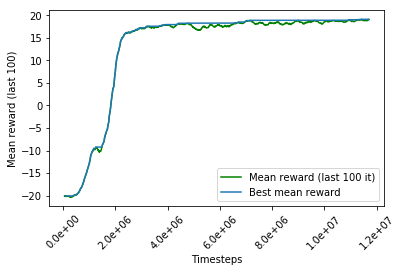

In [3]:
#with open('vanila_results.pkl','rb') as reward_file:
#with open('97cda9e9-9615-44cb-8d9a-bfe87e07e274.pkl','rb') as reward_file:
with open('mean_rew64d5c4a7-0ff4-4f56-b000-a18bd94b1970.pkl','rb')\
    as reward_file:
    rewards  = pickle.load(reward_file)
    plot_rewards_2(rewards)

### Question 1.2

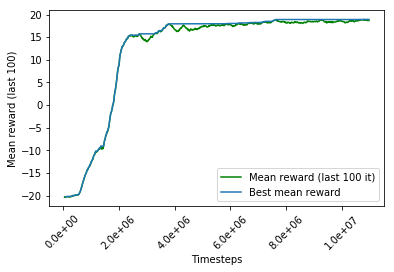

In [4]:
#with open('DoubleQ_results.pkl','rb') as reward_file:
#with open('4099900a-cfe5-44c0-a49e-3f5a8e6b2e4b.pkl','rb') as reward_file:
with open('mean_rewba72b328-77eb-4574-a14f-d15329e8378d.pkl','rb')\
    as reward_file:
    rewards  = pickle.load(reward_file)
    #print_rewards()
    #plot_rewards(rewards)
    plot_rewards_2(rewards)

### Question 1.3

The next assingment is run on lunar lander, and varying the learning rate.  
  
lr = 1e-3

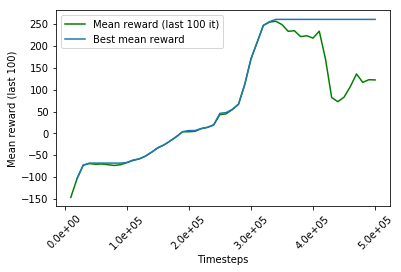

In [5]:
#with open('ll_lr1e-3.pkl','rb') as reward_file:
#with open('36217ba7-0733-4bd2-96d1-eeb31fc56ed4.pkl','rb') as reward_file:
with open('mean_rewa4b416af-07ce-4a73-b2ad-3ab178b8195f.pkl','rb')\
    as reward_file:
    rewards  = pickle.load(reward_file)
    plot_rewards_2(rewards)

lr = 1e-4

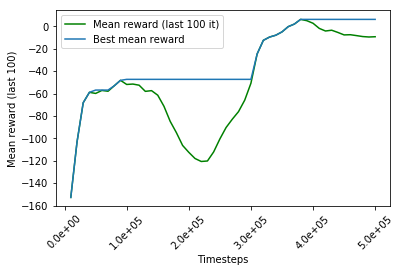

In [6]:
#with open('ll_lr1e-4.pkl','rb') as reward_file:
#with open('7fb13aa7-c7c9-472b-9c5e-23316ecefa4d.pkl','rb') as reward_file:
with open('mean_rewd7dcfcff-7045-44d0-b8fc-6c2f9a2556d8.pkl','rb')\
    as reward_file:
    rewards  = pickle.load(reward_file)
    plot_rewards_2(rewards)

lr = 1e-2

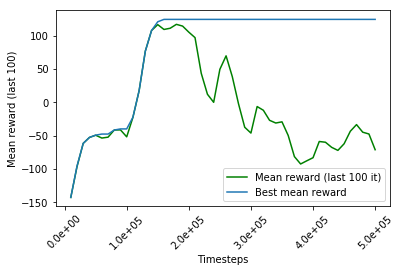

In [7]:
#with open('ll_lr1e-2.pkl','rb') as reward_file:
#with open('653cc0f4-8ce9-4770-ae43-e79e80686e89.pkl','rb') as reward_file:
with open('mean_rew37e74004-2017-43ba-8c91-8e0a4ed180de.pkl','rb')\
    as reward_file:
    rewards  = pickle.load(reward_file)
    plot_rewards_2(rewards)

Clearly the learning rate affects how effictively we can learn a problem. Choosing it to high, we might easily overshoot the maximums in the optimization task, and choosing it to low, will not allows us to learn the right actions within resonable time.

### Question 2.1

![Caption not working ](Question2.1_10_10.png "CartPole")
![Caption not working ](Question2.1_100_1.png "CartPole")
![Caption not working ](Question2.1_1_100.png "CartPole")
*Learning curves for the different combinations of **'Number-of-target-updates'\_'Number-of-gradient-updates-pr-target-update.'** for the CartPole problem using Monte-Carlo rollout, and actor-critic q_value estimation. **10\_10** and **1\_100** both have advantages. **10\_10** learns more quick, however **1\_100** is more stable at convergence. **'Number-of-gradient-updates-pr-target-update** acts as having a higher learning rate for the critic while the **'Number-of-target-updates'** acts in some way as having an n-step horizon*. Beacause of the lower variance **1\_100** is chosen.

### Question 2.2

![Caption not working ](Question2.2_pendulum_1_100.png "Inverted Pendulum")
*Shows Learning curve of the InvertedPendulum problem Using Monte-Carlo rollout, and actor-critic q_value estimation.*

![Caption not working ](Question2.2_half_cheetah_1_100.png "Inverted Pendulum")
*Shows Learning curve of the HalfCheetah problem Using Monte-Carlo rollout, and actor-critic q_value estimation.*

In [51]:
import tensorflow as tf
#print(type(tf.constant([1,2])))
tf_config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(
        #per_process_gpu_memory_fraction=1./16. # 1gb
        allow_growth=True
    )
)
with tf.Session(config=tf_config) as sess:
    tf.squeeze(tf.constant([[1,2]]))
    #print(tf.reshape(tf.tile(tf.reshape(tf.constant([[1,2]],[None])),tf.constant([[2]])),[2,2]).eval())
    b = tf.constant([0,1,5,3,4])
    arg = tf.argmax(b)
    #print(tf.expand_dims(arg,axis=1).eval())
    a = tf.constant([[1,2,3,4],[2,6,0,1],[0,1,2,4]])
    c = tf.gather(a,  1)
    print(tf.random_uniform([2,2],10,12).eval())
                #* (10 - -10) -10).eval())

[[11.309555  11.943472 ]
 [10.532686  11.0458765]]


# Guide for HPC and graphical appliactions for deep learning
*By Mathias R. Bjare muthissar@gmail.com*  
**Disclaimer:** *The following guide is the practices I use, better practices might exist.*

## Connecting
### Browser
https://thinlinc.gbar.dtu.dk/
### Thinlinc client
Get the client https://www.cendio.com/thinlinc/download  
  
In my oppenion the client works best, since the keyboard shortcuts are better supported.
To keep the session alive while closing the client (for instance when training) in the browser simply close the window, in the client press f8 and select disconnect.

Use your usual dtu crendentials.

## Loading preinstalled applications
The HPC comes with a number of preinstalled aplications with different versions which can be shown by
```bash
module avail
```
These applications can be loaded by:
```bash
module load <module>
```
i.e. 
```bash
module load python3/3.6.2
module load cuda/9.2 #requires GPU node as described below
module load tensorflow/1.12-gpu-python-3.6.2
```
If you want to autoload modules then add the lines to the ~/.bashrc file.  
  
Even more applications can be found at the /appl directory.

## Installing your own applications
You can also install your own applications in the ~/.local directory. For instance if you want to install jupyter run something as.
```bash
    pip3 install --user jupyter
```
Also portable applications can easily be run. For instance if you like visual code, get the portable 'tar.gz' from https://code.visualstudio.com/#alt-downloads  

You can also install from sources that uses configure and make by setting the prefix=~/.local (you might need to specify the absolute path of the .local folder). That could be something similar to:
```bash
./configure --prefix=~/.local
make install
```
In cmake this would correspond to 
```bash
cmake -DCMAKE_INSTALL_PREFIX=~/.local ..
```
## GPU session
If you want to use the GPU's in shell you need to run in a special shell.
Select from the top left **Applications Menu>DTU>xterm-LSF10-login-node**.  
Then connect to a gpu node using one of the following commands:
```bash
gpush
k40sh
voltash
sxm2sh
```
Add -X as a switch if you need a graphical session (opengl and such).
You can find more info on the GPU's and running batch jobs at 
https://www.hpc.dtu.dk/?page_id=2129
https://www.hpc.dtu.dk/?page_id=2759
If you have cuda loaded, you can also get info on the GPU utilization using the usual
```bash
nvidia-smi
```
## Tips
### Tensorflow
#### Avoids
I have noticed that opening a tensorflow gpu session will grab all the memory of the GPU node even though it doesn't use it. As we are all sharing the resources please restrict the memory usage by doing writing code similar to
```python
tf_config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(
        #per_process_gpu_memory_fraction=1./16. # use one 1 gb/16 gb for the process
        allow_growth=True
    )
)
```
That will allow for auto realloaction or fixed restricted memory usage.
#### Multi GPU's
Tensorflow will usually always select gpu 0 even though another core is availabe (check nvidia-smi to see which are available). You can set as an enviroment variable what core to run at by setting the environment variable CUDA_VISIBLE_DEVICES. For instance if you want to force a script to be run at gpu 1 you could do something similar as 
```bash
CUDA_VISIBLE_DEVICES=1 && python3 my_gpu_script.py
```